<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML2_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **2. Aprendizado Supervisionado e Regressão Linear**
---

Nesta aula você vai entender:

* O Aprendizado Supervisionado e as tarefas de Regressão e Classificação 
* Como aplicar modelos de Regressão Linear Simples e Múltipla na Predição de Quantidades
* Como avaliar a eficiência dos modelos de Regressão Linear

Nesta aula vamos nos deter sobre modelos de regressão linear para a predição de quantidades. Esses modelos são úteis e empregados em uma série de problemas de predição de preços de imóveis, alugueis, demanda de produtos e muitos casos onde predomina ou é de interesse analisar uma tendência linear de evolução dos dados. Por sua simplicidade modelos lineares são talvez o primeiro modelo que experimentamos ao tratar um problema de modelagem de dados para a predição de valores e, apesar de simples, eles se mostram tremendamente úteis na predição dos valores ou no entendimento das relações entre os dados. 

O modelo de regressão linear também é útil para entendermos de modo geral o funcionamento dos modelos de aprendizado supervisionado. Ele já traz em si todos os principais elementos que encontramos no aprendizado supervisionado: conjunto de treinamento, aprendizado, resultado probabilístico, métricas de eficiência do modelo etc. Assim, antes de prosseguirmos na aplicação de modelos de regressão vamos retomar e aprender mais sobre alguns conceitos do aprendizado supervisionado e das diferenças entre as tarefas de regressão e classificação. 





# Regressão e Classificação

O **Aprendizado Supervisionado** normalmente envolve dois tipos de problemas, problemas de Regressão e problemas de Classificação. Em ambos os casos você possui um conjunto de dados de treinamento com exemplos de entradas e saídas. Nos problemas de **Regressão** os rótulos dos dados (as saídas) são valores contínuos como o preço de imóveis ou a quantidade de clicks em página Web, sendo essas as quantidades que você quer prever para novos valores de entrada (por exemplo, uma data futura). Já nos problemas de **Classificação** os rótulos dos dados são valores discretos como `[Yes, No]`, `[True, False]`, `[Safe, Unsafe, Dangerous]`, `[Fraud, Not Fraud]` ou ainda `[Dogs, Cats, Fishes, Others]` em um conjunto de fotos de animais domésticos. Vamos empregar aqui dois exemplos de brinquedo apenas para você se familiarizar com esses modelos e entender a diferença.



## Exemplo de Regressão: Grilos e Temperatura

Grilos gorjeiam com mais frequência em dias quentes que em dias freios e profissionais e amadores coletaram dados sobre o gorjeio desses insetos por minuto e as temperaturas chegando a modelo linear que permite, através do número de gorjeios por minuto (a variável ou atributo preditor) estimar a temperatura (o rótulo, ou a variável objetivo). Os dados a seguir simulam esses dados. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


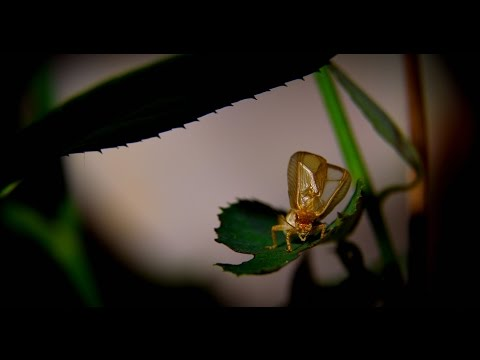

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo')

In [ ]:
np.random.seed(1)
df = pd.DataFrame()

df['temperature'] = np.arange(0,45,1)
df['chirps'] = (20 * df['temperature'] - 4) / 16 
df['chirps'] = df['chirps'] + np.round(np.random.sample(len(df))*5,0)

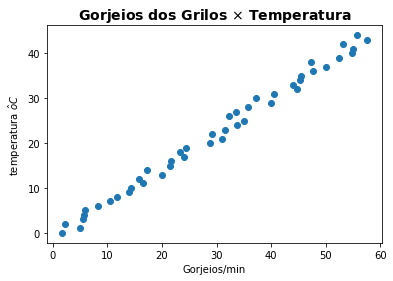

In [ ]:
plt.scatter(df['chirps'],df['temperature'])

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

Como você pode ver os dados se aproximam bastante de uma 'reta', um modelo linear, e podemos esperar escrever algo como:

$$ \text{Temperatura} = a_0 + a_1 \times \text{Gorjeios/min} $$

Que é a equação de uma reta.

Modelos de regressão podem ser ainda polinomiais, exponenciais etc., (diferentes classes de modelos de regressão), mas  escolhemos um modelo linear para aproximar os dados por quê observando os dados *esperamos* poder aproximá-los por uma reta! Os modelos lineares é a classe de modelos de regressão que escolhemos para aproximar nossos dados. 

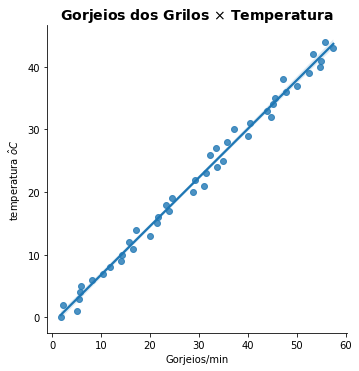

In [ ]:
sns.lmplot(x='chirps',y='temperature', data=df)

plt.title('Gorjeios dos Grilos $\\times$ Temperatura', fontsize=14, weight='bold')
plt.xlabel('Gorjeios/min')
plt.ylabel('temperatura $\^{o}C$')
plt.show()

Um modelo de regressão linear busca encontrar a reta que melhor se ajusta a esse conjunto de dados calculando os melhores coeficientes $a_0$ e $a_1$ que tornam os valores $\text{Temperatura}$ mais próximos dos valores reais. 

In [ ]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='temperature ~ chirps', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5334.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           9.94e-47
Time:                        02:06:15   Log-Likelihood:                -70.585
No. Observations:                  45   AIC:                             145.2
Df Residuals:                      43   BIC:                             148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9595      0.361     -2.659      0.0

Por hora, note apenas que os resultados do modelo acima mostram os coeficientes obtidos, `Intercept` e `chirps`. O  `Intercept` é o coeficiente livre da equação da reta que não está associado a qualquer variável preditora e recebe este nome por ser o valor que 'intercepta' o eixo $y$ quando os valores de todas as variáveis preditoras é nulo. `chirps` é o coeficiente dos gorjeios.

$$ \text{Temperatura} = -0.9595 + 0.7761 \times \text{Gorjeios/min} $$


E podemos empregar essa expressão para estimar a temperatura no caso de observarmos 32 gorjeios por minuto,



In [ ]:
Gorjeios_Observados = 32
Temperatura_Estimada = -0.9595 + 0.7761 * Gorjeios_Observados 
print(f'{Temperatura_Estimada:.2f} oC')

23.88 oC


Ou, o que é mais comum e em geral mais simples, empregar a função `predict` que aplica o modelo, 

In [ ]:
Gorjeios_Observados = pd.DataFrame({'chirps': [32]})
Temperatura_Estimada = lm.predict(Gorjeios_Observados)[0]

print(f'{Temperatura_Estimada:.2f} oC')

23.88 oC


<small> 
Este exemplo foi inspirado em, 
https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression.

## Exemplo de Classificação: Default Credit

Empresas de crédito estão bastante empenhadas e identificar possíveis 'calotes' (*default*) no pagamento do crédito cedido aos seus clientes e para isso elas buscam prever possíveis não pagamentos a partir do histórico de várias operações de crédito e dados dos seus clientes. Dados do cliente (como renda, idade, estado civil e escolaridade) e do crédito (valor, seu propósito, tempo) são os recursos empregados como variáveis preditoras e `default[True,False]` o rótulo dos dados que queremos prever para novas concessões de crédito ou créditos em andamento que desejamos avaliar o risco. Os dados abaixo simulam um conjunto de dados desse tipo com dados sobre renda, saldo e o pagamento ou não do crédito.



In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_samples=120, class_sep=0.85, weights=[0.7,0.3],
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2
)

df = pd.DataFrame()
df['income'] = ( X[:,0] + 3 ) * 10000
df['balance'] = X[:,1] * 1000
df['default'] = y
df['default'] = df['default'].astype('bool')

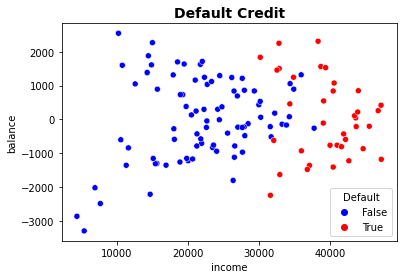

In [ ]:
sns.scatterplot(x='income',y='balance',hue='default',data=df,palette=['blue','red'])
plt.title('Default Credit', fontsize=14, weight='bold')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend(title='Default',loc='lower right')
plt.show()

plt.show()

Veja que a cor (azul ou vermelho) no gráfico acima adiciona uma dimensão dos dados ao representar o valor `default[True,False]` dos dados. Apesar de dois eixos temos 3 dimensões dos dados! income, balance e default!

Esse é um modo bastante comum de representarmos problemas de classificação envolvendo duas variáveis preditoras. 


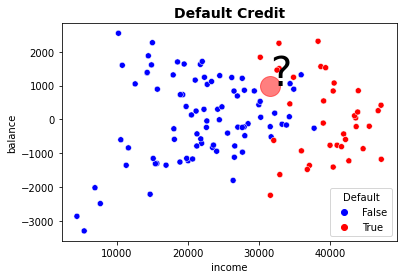

In [ ]:
sns.scatterplot(x='income',y='balance',hue='default',data=df,palette=['blue','red'])
plt.plot(31500,1000,marker='o',color='red',markersize=20,alpha=0.5)
plt.text(31500,1000,'?',fontsize=40)
plt.title('Default Credit', fontsize=14, weight='bold')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend(title='Default',loc='lower right')
plt.show()


O propósito do modelo é então classificarmos uma nova operação de crédito, digamos para um cliente com `[income, balance] = [31500,1000]`, como uma transação de sucesso ou não (`default[True|False]`). 

Assim como na Regressão, existem várias classes de modelos de classificação, como Árvores de Decisão, K-Vizinhos mais Próximos etc. que empregam princípios e parâmetros diferentes para a estimar as classes. Mas por hora estamos interessados apenas em observar o resultado das classificações sendo indiferente o método que vamos aplicar. Vamos empregar aqui o modelo de K-Vizinhos mais Próximos, e você verá mais sobre ele nas aulas adiante.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define as entradas e saídas do modelo
X = df[['income','balance']]
y = df['default']

# Define o modelo a ser empregado 
clf = KNeighborsClassifier(n_neighbors=3)

# Treina o modelo
clf.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

A forma de uso do modelo é bastante semelhante ao modelo de regressão. Definimos o modelo para em seguida buscar os parâmetros que melhor ajustam o modelo aos dados. 

Obtido o melhor modelo podemos fazer a predição de novos casos.

In [ ]:
novo_credito = pd.DataFrame({'income':[31500], 'balance':[1000]})

clf.predict(novo_credito)

array([False])

E para o crédito a um cliente com `[income, balance] = [31500,1000]` concluímos que o padrão dos dados sugere que não deverá calote nessa operação e que, portanto, o crédito poderia se concedido. 

# Modelos

Esses exemplos de brinquedo, embora simples, com poucos dados e atributos, já permite ter uma boa ideia de como esses modelos de aprendizado supervisionado funcionam e podemos agora prosseguir para entender melhor como eles realmente funcionam e têm em comum com muitos outros casos e modelos de aprendizado supervisionado que vamos estudar.



<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide4.PNG" width=800, align="center">

<small>

<b>
Figura 1. Esquema geral do Aprendizado de Máquina Supervisionado.

Um conjunto de dados $X \rightarrow y$ é define uma função $f:X \rightarrow y$ que podemos não conhecer (mesmo não existir no sentido de uma fórmula ou expressão como conhecemos). Você pode pensar na função que leva o número de gorjeios dos grilos às temperaturas ou os valores de balanço e renda à classificação de *default* nas operações de crédito. Essa é uma função desconhecida, mas que queremos aproximar encontrando uma função $g(x)$ que melhor se aproxima aos dados.

$$ f(x) \approx g(x)$$ 

$g(x)$ é um modelo que buscamos para os dados e vamos buscar inferir, ou obter essa função a partir de uma amostra dos pares $(X,y)$, nosso conjunto de treinamento onde $y$ são os rótulos dos dados.

Além dos dados rotulados (modelos Supervisionados), o Aprendizado de Máquina também requer como entrada uma classe de modelos que queremos empregar. Como você viu, existem modelos de Regressão e de classificação, e dentro desses modelos podemos por exemplo, escolher um modelo de regressão linear ou polinomial ou, para classificação, escolher entre um modelo de Árvore de Decisão ou K-Vizinhos mais Próximos. É nossa 'hipótese' de que os dados podem ser aproximados pelo modelo que escolhemos (o que vai poder funcionar ou não, mas veremos mais adiante sobre isso).

O Aprendizado de Máquina vai consistir, então, em buscar os melhores parâmetros para a família de modelos escolhida. Isso, em geral, se resume a buscar parâmetros que buscam minimizar o erro, ou a diferença, entre os valores estimados pelo modelo para e os dados, e há diferentes formas de se medir isso (acima representamos isso por $|| f(x) - g(x) ||$. Quando escolhemos acima um modelo linear  $ \text{Temperatura} = a_0 + a_1 \times \text{Gorjeios/min} $ ele corresponde a um número infinito de modelos possíveis já que há infinitos valores para os parâmetros $a_0$ e $a_1$, e o aprendizado consiste em encontrar os valores de $a_0$ e $a_1$ que melhor aproximam os dados. 







<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/ML/Slide5.PNG" width=800, align="center">

<small>

<b>
Figura 2. Esquema geral do Aprendizado de Máquina Supervisionado em poucas linhas de código. 

Isso nos dá a forma geral de como se dá o aprendizado em termos de sua programação:

1. **Definimos as Entradas e Saídas do Modelo**. Seus recursos e rótulos.
2. **Definimos a Classe de Modelos a ser empregada**. 
3. **Treinamos o Modelo**. Isto é, buscam-se os parâmetros que melhor ajustam o modelo aos dados.
4. **Prevemos novos casos**. Aplicamos o modelo para novos casos.

# Modelos são Probabilísticos

Diferente de uma fórmula os modelos não são determinísticos. Quando você prevê que a temperatura será 30oC com base na medida de gorjeios dos grilos ou quando prevê que o cliente não dará calote se você conceder crédito à ele isso pode ou não acontecer. Pode ser que a temperatura seja de fato abaixo ou acima e que o cliente, independente da sua predição dê um calote e que você tenha feito um mal negócio. Mas a ideia é que os modelos buscam retornar o valor ou a classe *mais provável* e que, portanto, independente de se mostrar correta ou não a predição o modelo, buscam fornecer respostas que aumentam as suas chances de estar correto. De fato, é famoso o aforismo do estatístico George Box de que *nenhum modelo é correto, mas alguns são úteis*.













<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/GeorgeEPBox.jpg/200px-GeorgeEPBox.jpg" width=200, align="center">

<small>

<b>
Figura 3. (George Box) <it> "Nenhum modelo é correto, mas alguns são úteis" </it>. Tenha isso sempre em mente ao empregar modelos de Aprendizado de Máquina.

> **(George Box) <it> "Nenhum modelo é correto, mas alguns são úteis" </it>. Tenha isso sempre em mente ao empregar modelos de Aprendizado de Máquina.**

Em consequência disso existem várias abordagens ou princípios diferentes que os modelos podem adotar na buscar de uma resposta mais provável e, desse modo, diferentes modelos podem levar a diferentes respostas e não há um único modelo 'certo'!

In [ ]:
# you can skip this code!

# Adaptado de Introduction to Machine Learning with Python by Andreas C. Müller, Sarah Guido
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

KNeighborsClassifier()
SVC()
DecisionTreeClassifier()


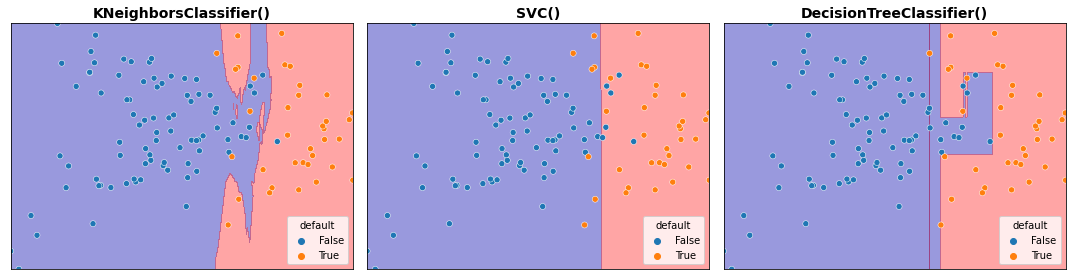

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = np.array(df[['income','balance']])
y = df['default']

models = [KNeighborsClassifier(n_neighbors=5),
          SVC(),
          DecisionTreeClassifier()]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for model, ax in zip(models, axes):
    print(model)
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, ax=ax)
    ax.set_title(model, fontsize=14, weight='bold')
    ax.set_xlabel('income')
    ax.set_ylabel('balance')

plt.tight_layout()
plt.show()

Por exemplo, no nosso exemplo de predição de crédito podemos aplicar modelos de  K-Vizinhos Mais Próximos, Support Vector Machines e de Árvores de Decisão. Os gráficos acima exibem a **fronteira de decisão** dos modelos, isto é, mostram as regiões associadas a cada uma das classes previstas pelo modelo.
Cada modelo emprega um princípio diferente (você pode pensar uma forma de cálculo diferente) na busca dos resultados mais prováveis. Levam, portanto, à predições diferentes das classes e não há, de modo geral, como afirmar que este ou aquele modelo é o modelo 'correto'. Nenhum é! Existem, entretanto, algumas métricas que podem ajudar na escolha de modelos *melhores* que outros. 

## O Fez Classificações Erradas? 

Talvez você tenha notado no exemplo acima que os modelos não classificam corretamente todos os dados do conjunto de treinamento. Você pode ver em todos eles pontos 'True' na região 'False' (área azul) e pontos 'False' na região 'True' (área vermelha do gráfico). Isso é algo comum nos modelos e que vamos estudar em detalhe. Por hora você deve lembrar que os modelos são construídos para classificação de *novos casos*. Um dado do conjunto de treinamento (não é um novo caso!) classificado errado apenas indica um caso que, apesar da maior probabilidade de pertencer a uma classe ele *ocorreu* de modo diferente. Você pode pensar estes casos como *outliers* ou exceções, que não seguiram as classes mais prováveis segundo algum critério.

# Regressão Linear 

Entendido como funcionam os modelos em geral podemos agora nos concentrar unicamente em como criar e avaliar modelos de Regressão Linear. 

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$$ \widehat y = a_0 + a_{1} x_1 + a_{2} x_2 + ... + a_{n} x_n $$
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $X=0$ (*intercept*). Se temos uma única variável preditora $x_1$ nosso modelo é uma reta e temos um modelo de **Regressão Simples**. Se temos mais dimensões temos um *hiperplano* e o modelo é uma **Regressão Múltipla**.  

Existem também outros modelos de Regressão. Por exemplo, um modelo de Regressão Polinomial busca aproximar os dados a um polinômio de grau $n$ e $ \widehat y = a_0 + a_{1} x_1^1 + a_{2} x_1^2 + ... + a_{n} x_1^n $ seria um modelo de Regressão Polinomial Simples de grau 2. Esses são modelos de **regressão não linear**, mas nos deteremos aqui unicamente em modelos lineares.






## Calculando os Coeficientes de uma Regressão Simples

No caso mais simples, nosso problema consiste em dados um conjunto de pontos $(x,y)$,  determinar os coeficientes da reta que melhor aproxima $r: x\rightarrow y$.

In [ ]:
# you can skip this code!
from scipy.stats import norm

x = np.arange(0, 100)
y = 2*x + 3
y = y + norm.rvs(loc=0, scale=50, size=100, random_state=1234)

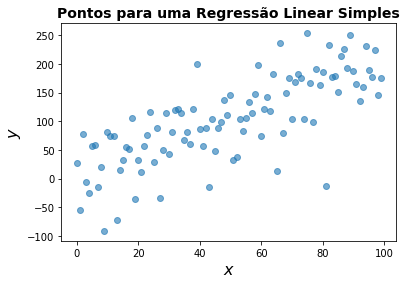

In [ ]:
plt.scatter(x,y,alpha=0.6)
plt.title('Pontos para uma Regressão Linear Simples', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

Dado um conjunto de pontos podemos traçar várias retas que *aproximam* de diferentes modos o conjunto de pontos. A regressão linear simples é definida pela reta que minimiza o erro ou a distância dos pontos $y$ dos valores estimados $\hat{y}$. 

Dado um conjunto de pontos $(x_i,y_i), i=0,...,n$ queremos buscar a reta $\hat{y} = a + b x$ que reduz o erro das estimativas de $y$. Esse erro pode ser medido pela distância dos pontos $y$ e $\hat{y}$, ou mais simplesmente pela distância quadrática, e podemos escrever esse erro em função de $a$ e $b$, que ainda não conhecemos os valores:

$$ E(a,b) = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 $$
$$ E(a,b) = \sum_{i=1}^{n}(y_i - a - b x_i)^2 $$

O ponto de mínimo da função de Erro $E(a,b)$ fornece os valores $a$ e $b$ dos coeficientes da reta,

$$ \min_{a, b} E(a,b) = \min_{a, b} \sum_{i=1}^{n}(y_i - a - b x_i)^2 $$

e pode ser obtido a partir das derivadas com relação a esses parâmetros,

$$ \partial E / \partial a =  -2 \sum_{i=1}^{n}(y_i - a - b x_i) = 0$$

$$ \partial E / \partial b =  -2 \sum_{i=1}^{n}x_i(y_i - a - b x_i) = 0 $$

Resolvendo-se esse sistema de equações você obtêm:

$$ a = \bar{y} - b \bar{x} $$
onde $\bar{y}$ e $\bar{x}$ são a média dos valores $y_i$ e $x_i$, e:

$$ b = \frac{ \sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2 } $$

Os valores dessa expressão não devem ser estranhos a você. De fato,  eles são a $cov(x,y)$ e a $var(x)$ e, desse modo, podemos escrever simplesmente:


$$ b = \frac{cov(x,y)}{var(x)}  $$ 

<br>

$$ a = \bar{y} - b \bar{x} $$

Empregando o conjunto de pontos acima podemos verificar os coeficientes produzidos: 


In [ ]:
# A diagonal da matriz contém a covariância entre cada variável e ela mesma

b = np.cov(x,y)[1,0] / np.var(x); print(b)
a = np.mean(y) - b*np.mean(x); print(a)

1.9850551363966769
5.495384904636339


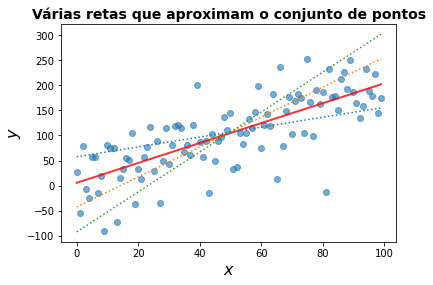

In [ ]:
# you can skip this code!

y2 = a + b*x
y3 = (y2[51] - 50*(b-1))+(b-1)*x
y4 = (y2[51] - 50*(b+1))+(b+1)*x
y5 = (y2[51] - 50*(b+2))+(b+2)*x

plt.scatter(x, y, alpha=0.6)
plt.plot(x, y2, c='red', lw=2, alpha=0.8)
plt.plot(x, y3, linestyle='dotted')
plt.plot(x, y4, linestyle='dotted')
plt.plot(x, y5, linestyle='dotted')

plt.title('Várias retas que aproximam o conjunto de pontos', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

E, assim, determinamos a reta que melhor estima os valores de $y$:

$$ \hat{y} = a + bx = 1.98 + 5.49 x $$

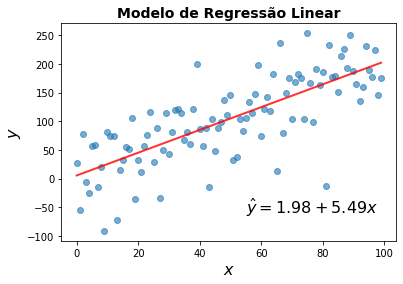

In [ ]:
# you can skip this code!

plt.scatter(x, y, alpha=0.6)
plt.plot(x, y2, c='red', lw=2, alpha=0.8)

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.text(55,-60,'$ \hat{y} = 1.98 + 5.49 x $', fontsize=16)
plt.show()

# Regressão Linear Múltipla

No modelo linear mais geral o valor de variável objetivo, ou dependente, $y$ é obtido a partir de uma combinação linear de um conjunto de variáveis preditoras, ou dependentes, $X$. 

$$  \widehat y = a_0 + a_{1} x_{1} + a_{2} x_{2} + ... + a_{n} x_{n} $$ 
 
Agora, a cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $X_i=0$ (*intercept*). 

Os coeficientes $a_n$ são obtidos do mesmo modo que na regressão simples, minimizando-se o erro  entre os valores de $y$  nos dados e os valores estimados $\widehat y$, e podemos escrever:

$$ \min_{a_i}\sum (y_i - \widehat y_i )^2 = $$ 

$$ \min_{a_i} \sum (y_i - (a_0 + a_{1} x_{1} + ... + a_{n} x_{n}) )^2 $$ 

Não há, entretanto, nenhuma fórmula ou expressão para obtermos de forma algébrica os valores de $a_i$ que são obitidos, de modo geral, aplicando-se algum método de otimização, como o  método de mínimos quadrados, sendo o erro uma função convexa que garante a existência de um único ponto de mínimo.

> **Para quaisquer conjuntos de dados $(X, y)$ sempre é possível se calcular os coeficientes de uma regressão linear. Esses coeficientes fornecem sempre a melhor reta ou *hiperplano* que se ajusta os dados. A pergunta é: seria esse ajuste é suficientemente bom?** 








# Avaliando a Eficiência do Modelo: Coeficiente de Determinação, $R^2$ 

No caso de uma regressão simples podemos calcular diretamente os coeficientes $a$ e $b$ empregando apenas os valores médios de $x$ e $y$, a $cov(x,y)$ e a $var(x)$. Assim, para quaisquer conjuntos de dados podemos *sempre* calcular um modelo de regressão *mesmo que o modelo linear não represente exatamente nossos dados*.  Isso é ilustrado pelo exemplo a seguir.


In [ ]:
# you can skip this code!

x = np.arange(-10,10,1)
ruido = norm.rvs(loc=0, scale=1, size=len(x), random_state=1234)
df = pd.DataFrame({'dataset':'I','x':x,'y': 2*x + 3 + ruido})
df = pd.concat( [df, pd.DataFrame({'dataset':'II','x':x,'y': 2*x**2 + 3 }) ])
df = pd.concat( [df, pd.DataFrame({'dataset':'III','x':x,'y': x**3 - 2*x }) ])
df = pd.concat( [df, pd.DataFrame({'dataset':'IV','x':x,'y': np.exp(1)**x }) ])

In [ ]:
df

,dataset,x,y
0,I,-10,-16.528565
1,I,-9,-16.190976
2,I,-8,-11.567293
3,I,-7,-11.312652
4,I,-6,-9.720589
...,...,...,...
15,IV,5,148.413159
16,IV,6,403.428793
17,IV,7,1096.633158
18,IV,8,2980.957987


Modelo de Regressão, Dataset: I  
1.991 x + 2.984
Modelo de Regressão, Dataset: II  
-2 x + 69
Modelo de Regressão, Dataset: III  
58.4 x - 19.8
Modelo de Regressão, Dataset: IV  
171.9 x + 726.9


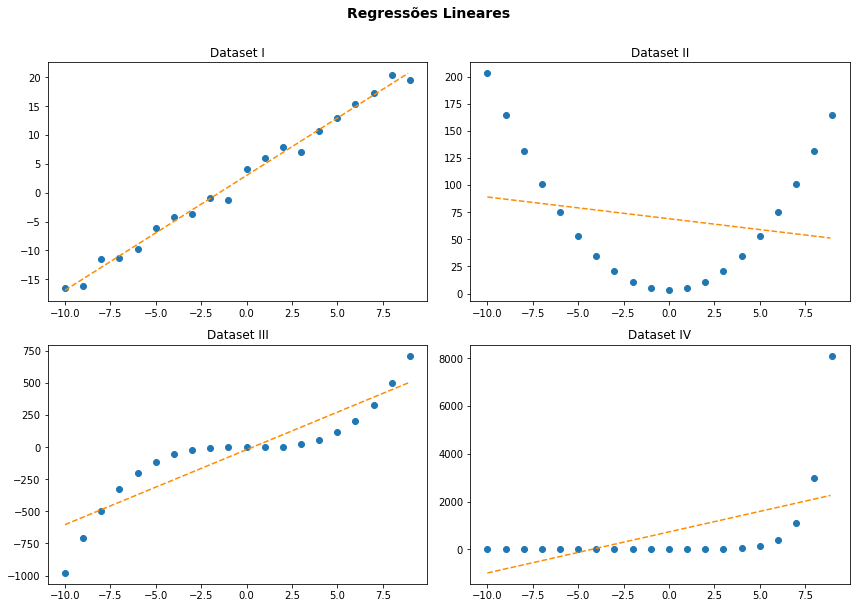

In [ ]:
# you can skip this code!

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Regressões Lineares', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)
  print('Modelo de Regressão, Dataset:', ds_type, p)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  ax[i//2,i%2].set_title('Dataset ' + ds_type)

  i += 1

plt.tight_layout()
plt.show()

Os quatro conjuntos de dados acima foram obtidos aplicando-se as funções: 

$ (I) \space \space  \space \space y = 2x + 3 + \epsilon , \text{onde} \space  \epsilon = \text{noise} $ 

$ (II) \space \space  \space \space y = 2x^2 + 3   $

$ (III) \space \space  \space \space y  =  x^3 - 2x  $

$ (IV) \space \space  \space \space y  = x cos(x) + x   $

Embora apenas o conjunto de dados $I$ se ajuste de fato a um modelo linear você pode notar que podemos calcular o modelo linear em todos os casos, *mesmo ele não se ajustando aos dados*!

No caso de uma regressão simples você pode observar o ajuste ou não do modelo fazendo uma inspeção visual como acima. Mas o mesmo pode ocorrer no caso de uma regressão múltipla e, neste caso, havendo mais dimensões você não poderá observar o ajuste dos dados ao modelo. Por isso é necessário termos uma métrica, uma medida que avalia a **eficiência do modelo**, ou o quanto os dados se ajustam ao nosso modelo proposto. A métrica mais importante para uma regressão linear é o **Coeficiente de Determinação**, $R^2$ ou ainda $R-Square$.

O **Coeficiente de Determinação** é uma medida no intervalo $[0,1]$ que indica o quanto um modelo linear explica a variância de um conjunto de dados. Quanto mais próximo de $1$ o valor do $R^2$, mais os dados se ajustam ao  modelo linear. 

$$ R^2 = 1 - \frac{E_{res}}{E_{total}} $$


onde 

$$E_{res} = \sum (y_i - \widehat y_i )^2 $$  é a *soma dos quadrados residuais* e,

$$E_{total} = \sum (y_i - \bar y )^2 $$ 


é a *soma total dos quadrados*.




De fato, como você pode observar, somente o primeiro conjunto dos quatro conjuntos de dados acima têm apresentam um coeficiente de determinação próximo de 1.

In [ ]:
# you can skip this code!

R2 = {}
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)

  R2[ds_type] = 1 - sum((ds.y - p(ds.x))**2) / sum((ds.y - np.mean(y))**2)
 
for dataset, r2 in R2.items():
  print('Dataset ' + dataset + ', R-Square = ' + str(np.round(r2,4)))
  

Dataset I, R-Square = 0.9999
Dataset II, R-Square = 0.266
Dataset III, R-Square = 0.8505
Dataset IV, R-Square = 0.3459


Basicamente o coeficiente de determinação é uma medida de proporção que verifica o quanto variância dos dados está representada no modelo com relação ao modelo trivial $y = \bar{x}$.


<br>
<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg"  width=500, align="center">
<br>
<br>
<br>

<small>
<b>
Figura 4. À esquerda, em vermelho, as variâncias com relação ao modelo trivial e, à direita, as variâncias do modelo de regressão (em azul). <br></b>(Fonte: Wikipedia)

O $R^2$ é útil para avaliarmos a adequação de um modelo de regressão linear aos dados e pode também ser empregado para compararmos modelos que disputam entre si. Por exemplo, você pode ter dois modelos de regressão múltipla para obter o preço de imóveis. Um deles considera um atributo adicional *bairro  do imóvel*, o outro não. O coeficiente então pode ser empregado para avaliar qual o melhor modelo. 

> **Você vai encontrar essas métricas de avaliação de eficiência dos modelos para quaisquer modelos supervisionados e elas podem ser empregadas na busca de um melhor modelo, ajustando parâmetros de um modelo ou na seleção entre vários modelos que competem.**

# $R^2$ Ajustado

O $R^2$ Ajustado é uma medida alternativa para avaliação do modelo e existem ainda outras métricas. 

A inclusão de inúmeras variáveis, mesmo com pouco poder explicativo sobre a variável dependente, podem sempre aumentar o valor de $R^2$. Isso é um incentivo para a inclusão indiscriminada de variáveis, prejudicando o princípio da parcimônia (princípio da *navalha de Ockham*) em que o aumento de complexidade não leva a ganhos proporcionais no modelo. Para evitar isso você pode empregar o coeficiente de determinação ajustado que penaliza a inclusão de preditores pouco explicativos no modelo:  

$${\displaystyle {\bar {R^{2}}}=1-{\frac {n-1}{n-(k+1)}}\left(1-R^{2}\right),}
 $$

$k+1 $ representa o número de variáveis explicativas mais a constante, e a inclusão de variáveis pouco explicativas passa a penalizar o valor do $R^2$ com o valor ajustado para baixo.

# Modelos de Regressão em Python

Você vai aprender agora como obter modelos de regressão simples e múltipla empregando o pacote `statsmodels` do Python. Vamos começar com uma regressão simples de valores aleatórios, algo que já fizemos antes, mas agora vamos fazer passo a passo para você se familiarizar com a construção do modelo. 

In [ ]:
import statsmodels.formula.api as sm

Vamos gerar uma amostra de 50 valores "aleatórios" a partir de uma função linear.    

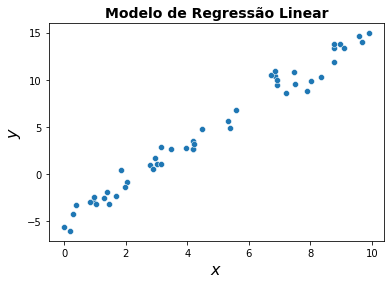

,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193


In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x=x, y=y)

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()


df = pd.DataFrame({'x':x,'y':y})
df.head()

## Construindo o modelo linear, `sm.ols(formula = , data= )`

A função `sm.ols()` (ordinary least squares, se refere ao método de otimização empregado) requer um conjunto de treinamento e um parâmetro `formula` (*patsy* fórmula, um formato bastante empregado em modelos) que indica a variável dependente (objetivo) e as variáveis independentes (preditoras) do modelo. 

````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + a_1 x $$



Podemos então declarar o modelo,

In [ ]:
# Define o modelo
model = sm.ols(formula='y ~ x', data=df)


E em seguida fazer o ajuste, *fit*, do modelo aos dados. É o treinamento ou aprendizado do modelo. 

In [ ]:
# Treinamento
result = model.fit()


O método `summary()` apresenta, então, vários resultados do modelo.

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           5.71e-42
Time:                        02:04:52   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

Observando os coeficientes no sumário do modelo acima vemos que o modelo de aproximação linear é dado por:

$$ \hat y = -4.9986 + 2.0272 x $$

E podemos empregar o modelo para estimar   valores de $y$, isto é $\bar y$ (`predicted`), e  comparar seus valores. 


In [ ]:
df['predicted'] = result.predict(df.x)

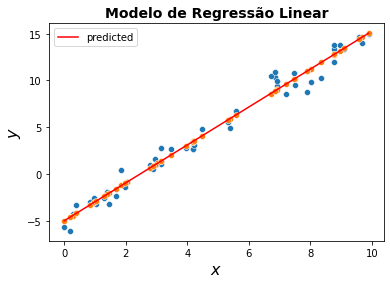

In [ ]:
sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='predicted',data=df)
sns.lineplot(x='x',y='predicted',data=df,color='red', label='predicted')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

plt.legend()
plt.show()

## Analisando a Eficiência do Modelo

O Sumário acima ainda traz o Coeficiente de Determinação e os *p-values* dos coeficientes. O primeiro você já conhece e é uma medida geral da eficiência do modelo.

$$ R^2 = 0.979 $$

Esse é um valor bastante próximo de 1 e que garante termos um modelo que explica bastante bem os dados.

Outra medida importante de se observar são os $p-values$ dos coeficientes. Eles são um teste de hipótese sobre os valores dos coeficientes onde a hipótese nula é de que os coeficientes são não significativos ($= 0$). A hipótese alternativa é de que o coeficiente é significativo (e, portanto $\ne 0$). Assim, $ p-values < 0.05 $ indicarão que o coeficiente é significativo para o modelo e podemos observar que para os dois coeficientes acima (`Intercept` e `x`) os valores são significativos.

$$ p-value(a_i) < 0.05 \Rightarrow a_i \space \text{é Significativo} $$

Podemos assim, dizer que

$$ \hat y = -4.9986 + 2.0272 x $$ 

é um modelo que aproxima bastante bem os dados.

Existem várias outras métricas nos resultados acima, mas para os nossos propósitos a análise acima já é suficiente.

> **$R^2$ qual é um bom valor? Novamente não existe um modelo 'certo' e a questão é melhor formulada em termos de: qual é um bom resultado para os seus propósitos? Mas de modo geral valores $R^2 > 0.8$ já são bastante úteis mesmo para predições e com valores abaixo $R^2 < 0.6$ recomendaríamos buscar outros modelos de aproximação dos dados.**


# CASO: Estimando o Preço de Veículos

Vamos empregar agora um conjunto de dados mais interessante e estimar o Preço de veículos com base em suas características. Vamos empregar o seguinte conjunto de dados:

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Preparação dos Dados

A **Fase de Preparação dos Dados** difere caso a caso, mas um princípio geral é nesta fase precisamos preparar o dado da melhor forma para que sejam aplicados os modelos. É uma boa prática, senão obrigatório, uma exploração dos dados para que você conheça os dados antes de aplicar os modelos.

Aqui a api `statsmodels.formula.api` não suporta nome de atributos com '.' e precisamos adequar o nomde dos atributos antes de aplicar o modelo.

In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


A avaliação de valores ausentes é uma boa prática,

In [ ]:
df.isnull().sum()

Manufacturer         0
Model                0
Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGcity              0
MPGhighway           0
AirBags              0
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
Revpermile           0
Mantransavail        0
Fueltankcapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
Turncircle           0
Rearseatroom         2
Luggageroom         11
Weight               0
Origin               0
Make                 0
dtype: int64

Mas os valores ausentes neste caso não impactam nossos modelos (eles não serão variáveis nem dependente e nem independentes no modelo). 

## Regressão Linear Simples

Inicialmente vamos empregar somente variáveis numéricas para estimar o Preço, `Price`, dos veículos começando por um modelo de regressão linear simples empregando apenas a potência do motor, `Horsepower`, como variável preditora.

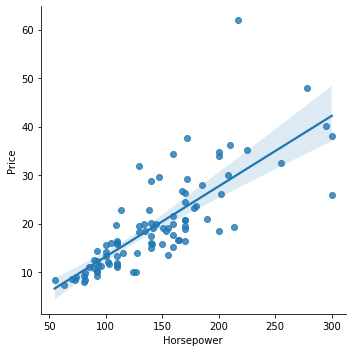

In [ ]:
sns.lmplot(x='Horsepower',y='Price',data=df)
plt.show()

Vamos, portanto, tentar inicialmente determinar o preço a partir somente da potência dos veículos, isto é:

$$ \hat{Price} =  a_0 + a_1 \text{Horsepower} $$



In [ ]:
model = sm.ols(formula="Price ~ Horsepower", data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           6.84e-21
Time:                        02:04:53   Log-Likelihood:                -297.23
No. Observations:                  93   AIC:                             598.5
Df Residuals:                      91   BIC:                             603.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3988      1.820     -0.769      0.4

Obtemos assim o modelo:

$$ \hat{Price} =  -1.3988 + 0.1454 \times \text{Horsepower} $$   
 



## Predição de novos valores, `predict(x)`

Podemos agora empregar nosso modelo para estimar o preço de um novo veículo para o qual conhecemos a potência:

In [ ]:
x = pd.DataFrame({'Horsepower': [150,180]})
result.predict(x)

0    20.406915
1    24.768052
dtype: float64

## Avaliando o Modelo



Sendo uma regressão simples podemos fazer uma inspeção visual do modelo.

In [ ]:
df['predicted'] = result.predict()

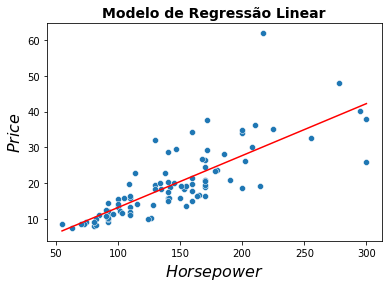

In [ ]:
sns.scatterplot(x='Horsepower', y='Price', data=df)
sns.lineplot(x='Horsepower', y='predicted', data=df, color='red')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$Horsepower$', fontsize=16)
plt.ylabel('$Price$', fontsize=16)

plt.show()


Os dados parecem se ajustar muito parcialmente aos dados. Mas a inspeção visual é bastante limitada e, no máximo, pode permitir a avaliação de modelos de regressão simples, em duas dimensões.

### Analisando o $R^2$ e *p-values*

$$ R^2 = 0.621$$
$$ p-values = 0.444 > 0.05 \text{, para o intercept}$$

A análise do coeficiente de determinação e do *p-value* dos coeficientes é uma forma mais efetiva de avaliação e pode ser aplicada também a modelos de regressão múltipla (com mais de uma variável preditora). Os valores também mostram que os dados se ajustam de modo bastante parcial ao modelo, que explica somente 62.1% da variação dos dados havendo ainda um coeficiente (*intercept*) não significativo para o modelo. O intervalo de confiança seria ainda uma verificação adicional e fornece o intervalo de valores de cada coeficiente, e que podemos empregar para identificar possíveis desvios nos coeficientes. 

## Regressão Múltipla: Adicionando Mais Variáveis ao Modelo

Sendo o ajuste do modelo anterior parcial vamos buscar aprimorar o modelo adicionando mais variáveis preditoras. Vamos, entretanto, ainda nos atermos a entradas numéricas no modelo.

In [ ]:
model = sm.ols(formula="Price ~ Passengers +	Length +	Wheelbase	+ \
              Width	+ Turncircle + Luggageroom + \
              Weight + Horsepower + EngineSize + \
              RPM + Wheelbase ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.94
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.32e-16
Time:                        02:04:54   Log-Likelihood:                -251.04
No. Observations:                  82   AIC:                             524.1
Df Residuals:                      71   BIC:                             550.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1792     28.749      1.850      

A inspeção visual agora não é mais possível mas podemos analisar as métricas do modelo. O modelo agora apresenta um resultado melhor, mas ainda assim parcial. 

$ \bar{R}^2 = 0.689 $, note, estamos vendo agora o $\bar{R}^2$ **ajustado**!

$ p-values > 0.05 $

O $\bar{R}^2$, ajustado, ainda é bastante inferior a $0.8$ (um valor a partir do qual as predições começam a ficar interessantes) e ainda existem estimadores não sigficantes, incluindo o `Intercept`. 

Um modelo melhor pode ser obtido. Vamos empregar agora somente os estimadores relevantes, e empregaremos o $-1$ na fórmula para excluir o `Intercept` do modelo. 

In [ ]:
model = sm.ols(formula="Price ~ Wheelbase	+ Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              476.8
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                    4.19e-55
Time:                        02:04:54   Log-Likelihood:                         -286.90
No. Observations:                  93   AIC:                                      579.8
Df Residuals:                      90   BIC:                                      587.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Conseguimos agora um modelo que parece suficientemente bom e que explica mais de 93% da variação dos preços dos veículos. 

$$ \bar{R}^2 = 0.939 $$
$$ p-values < 0.05 $$

Este é um modelo bastante bom e que podemos agora empregar para fazer predições de preços de uma forma mais ou menos segura. Podemos, por exemplo, estimar o preço de um veículo hipotético com as medidas médias de `Wheelbase`,`Width` e `Horsepower`. 

In [ ]:
x = pd.DataFrame({'Wheelbase': [ df.Wheelbase.mean() ],
                  'Width': [ df.Width.mean() ],
                  'Horsepower': [ df.Horsepower.mean() ]})
preco_estimado = result.predict(x)[0]

print(f'Preço estimado (US$ 1000): {preco_estimado:.2f}')

Preço estimado (US$ 1000): 19.48


# Adicionando Variáveis Categóricas

O pacote `statsmodel` permite empregar variáveis categóricas diretamente. Como o cálculo dos coeficientes requer atributos numéricos o pacote transforma esses atributos internamente fazendo o *hot encode* dos dados. 

In [ ]:
model = sm.ols(formula="Price ~ Origin + Wheelbase + Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     53.85
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           7.17e-23
Time:                        02:04:54   Log-Likelihood:                -284.82
No. Observations:                  93   AIC:                             579.6
Df Residuals:                      88   BIC:                             592.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Origin[USA]        -0.2091     14.536     

Por exemplo, ao incluir o atributo categórico `Origin`, que possui valores `USA` e `non-USA`, o pacote cria as variáveis binárias (*hot encode*) `Origin[USA]` e `Origin[non-USA]` para serem empregadas no modelo. Aqui o modelo apresentou um resultado pior que o modelo anterior, mas seu  objetivo aqui é apenas de mostrar o uso de atributos categóricos em um modelo de regressão.

O uso de variáveis categóricas é muito importante em várias aplicações de modelos de regressão e você pode, por exemplo, pensar na importância de um atributo categórico como *bairro* ou *marca* para a estimativa de preços de imóveis ou veículos.

# Erros Comuns na Interpretação do Modelo

Dois erros são bastante comuns na intepretação de modelos de regressão linear e nos dois casos, podem levar a conclusões bastante errôneas.





## $R^2 \approx  0 \Rightarrow $ não há relação entre os dados.

Isso não é necessariamente verdade. 

In [ ]:
data = pd.DataFrame()
data['x'] = np.arange(-10,10,0.1)
data['y'] = data['x']**2

model = sm.ols(formula="y ~ x", data=data)
result = model.fit()
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.07426
Date:                Sun, 06 Mar 2022   Prob (F-statistic):              0.786
Time:                        02:04:54   Log-Likelihood:                -962.77
No. Observations:                 200   AIC:                             1930.
Df Residuals:                     198   BIC:                             1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.3300      2.119     15.731      0.0

A regressão acima tem $R^2 = 0$, mas os dados tem uma clara relação como mostra o gráfico.

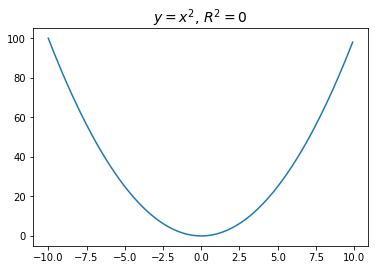

In [ ]:
plt.plot(data['x'],data['y'])
plt.title('$y = x^2$, $R^2 = 0$',fontsize=14)
plt.show()

O coeficiente $R^2$ indica somente a presença de relações **lineares** entre os dados podendo haver muitas outras relações que não as relações lineares como mostra o exemplo acima. 

## $R^2 \approx 1 \Rightarrow $ então $x$ é **causa** e $y$ **efeito**.

Isso não é necessariamente verdade. 

Talvez ainda mais comum que o erro anterior e até mais grave é concluírmos a partir de uma regressão linear válida uma relação de **causa-efeito** entre essas variáveis, embora em muitos casos isso possa ser verdade.

A área de um imóvel e sua idade tem, em geral, um efeito sobre o preço do imóvel, e a renda de um país tem um efeito sobre a expectativa de vida das pessoas, o que pode ser observado se implementamos um modelo, linear ou não. Mas a presença de relação linear entre os dados **não garante** que exista uma relação de causa-efeito. Uma relação linear apenas diz que observando os valores das variáveis independentes podemos estimar com alguma confiança os valores da variável dependente. Isso não permite determinar quem é a causa ou quem é o efeito e nem mesmo se existe uma relação de causa-efeito. Ambas, por exemplo, podem ter uma causa comum e, portanto, seus valores podem simplesmente *andarem* juntos e há uma série de casos de correlações espúrias entre os dados. 






<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/spurious1.png" width=800, align="center">


<img src="https://github.com/Rogerio-mack/Machine-Learning-I/raw/main/Figures/spurious2.png" width=800, align="center">

<small>

<b>
Figura 4. Relações espúrias entre dados exibindo uma correlação bastante alta ~ 0.99. Uma interpretação errada poderia levar a entendermos que os gastos com ciência são a causa de um maior número de suicídios (acima) ou que um menor consumo de margarina pode levar a uma redução do número de divórcios (abaixo). Uma nota: não nos deteremos aqui nas diferenças de correlação e coeficiente de determinação, pois não altera o observado aqui e não tem relevância para os nossos propósitos. Fonte: https://www.tylervigen.com/spurious-correlations

# Sumário da Aula

A partir de modelos simples de regressão e classificação você pôde entender alguns conceitos importantes e comuns a vários modelos de Aprendizado Supervisionado como seu caráter **probabilístico, conjunto de treinamento, variáveis preditoras e objetivo, métricas de eficiência e classes de modelos**. 

Você compreendeu também a diferença entre problemas de **regressão**, que estimam quantidades, e problemas de **classificação**, estimam categorias ou classes dos dados. Ambos são modelos supervisionados onde os casos de treinamento são previamente rotulados e sobre o qual construímos modelos para a predição de novos casos. 

Você também aprendeu a criar modelos de **Regressão Linear Simples** e **Múltipla** empregando o pacote `statsmodels` e como avaliar esses modelos observando os valores de $R^2$ (coeficiente de determinação) e os **p-values** dos coeficientes. Com isso você pôde entender como podemos construir e refinar um modelo até obtermos um modelo útil para os nossos propósitos. Ao final você ainda viu alguns **erros comuns** e aos quais você deve estar atento na interpretação desses modelos. 




# Para Saber Mais

* Modelos de regressão linear podem ser associados a transformações, como por exemplo a aplicação de $log()$, e podemos aplicar um modelo para aproxima $ Log(y) = a_0 + a_1 x_1 + a_2 x_2 + ...$ no lugar $y$. Isso expande a capacidade do modelo linear e é útil em uma série de problemas práticos como cálculo de preços de imóveis e aluguéis por exemplo. Pesquise sobre isso ou tente reproduzir o modelo de preços de veículos criado aqui obtendo um modelo de $Log(Price)$. 

* Vamos relembrar o que é o *Hot Encode*? Acesse: https://www.educative.io/blog/one-hot-encoding e veja também como fazer o *hot encode* com o `Pandas` ou ainda com `scikit-learn`. Modelos de regressão requerem valores numéricos e essa transformação é útil quando queremos incluir no nosso modelo variáveis categóricas, como no caso de bairro ou marca do veículo para um modelo de preços de imóveis ou carros. 

* Embora tenhamos usado aqui o pacote `statsmodel` o pacote `scikit-learn` é mais geral para modelos de aprendizado de máquina e é o que devemos usar daqui para diante na maior parte dos modelos. Mas ele também implementa modelos de regressão linear e você pode consultar o site https://scikit-learn.org e entender como implementar esses modelos ou ainda acessar Jake VanderPlas. **Python Data Science Handbook**  Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/ onde você encontra um capítulo dedicado à regressão linear.

* Acesse também https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression e assista a um vídeo de introdução aos modelos de regressão linear na visão da Google.

# Referências

* MÜLLER, Andreas C.; GUIDO, Sarah. **Introduction to machine learning with Python: a guide for data scientists.** O'Reilly Media, Inc., 2016. (parcial online: https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/ch01.html).

* Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.

* Jake VanderPlas. **Python Data Science Handbook**  O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 06 de Novembro de 2021.

* Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

* ___. **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Acesso em: 06 de Novembro de 2021.

* ___. **scikit-learn: machine learning in Python** Disponível em: http://scipy-lectures.org/packages/scikit-learn/index.html Acesso em: 06 de Novembro de 2021.

* ___.**Google, Crash Course - ML Introduction**. Disponível em: https://developers.google.com/machine-learning/crash-course/ml-intro. Acesso em: 03 de Março de 2022.